## Graph data structure
## Copyright: Jagadeesh Vasudevamurthy
## filename:graph.ipynb¶

# All import here

In [1]:
import sys # For getting Python Version
import os
import enum # For enum
import math  # for infinity
from graphviz import Source
print("Version of Python I am using is", sys.version)

Version of Python I am using is 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:49:36) [Clang 16.0.6 ]


# Graph input and output directory setup
# YOU MUST CHANGE 2 lines below

In [2]:
inputFileBase = "/Users/sushmaka/PSA/graphdata/"
outputFileBase = "/Users/sushmaka/PSA/Output/" 

In [3]:
def read_dot_file(f:'string')->'dot_graph':
    filename = outputFileBase + f + ".dot"
    print(filename)
    with open(filename) as f1:
        dot_graph = f1.read()
    print(dot_graph)
    return(dot_graph)

# YOU WRITE CODE HERE

# Graph buider from file

In [4]:
############################################################
# GraphBuilder.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

class GraphBuilder:
    def __init__(self, g: "graph", f: "string"):
        self._g = g
        # graph object
        self._f = f  # File from which you are building graph
        self._g._g = self._build_graph()

    ############################################################
    # Write code: build_graph
    # Use as many private functions and prvate data you want
    ###########################################################
    def _build_graph(self) -> "None":
        notReadline = 0
        readline = 0
        with open(self._f, "r") as file:
            data = file.readlines()
            for aline in data:
                token = aline.split()
                size = len(token)
                if (size < 2) or (size > 3):
                    notReadline = notReadline + 1
                    print("NOT READ LINE", aline)
                    continue
                readline = readline + 1
                tf = token[0]
                tt = token[1]
                if (tf == tt):
                  notReadline = notReadline + 1
                  print("NOT READ LINE", aline)
                  continue ;
                weight = 0
                if size == 3:
                    tw = token[2]
                    weight = float(tw)
                
                self._g.add_edge(tf, tt, weight)


# Write Graph as a dot file

In [5]:
############################################################
# GraphDot.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2020
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

class GraphDot:
    def __init__(self, g, f):
        self._g = g  # Handle to graph
        self._f = f  # File where you write graph in dot format
        self._of = open(self._f, "w")
        self._write_dot()
        self._of.close()

    ############################################################
    # Write code: _write_dot
    # Use as many private functions and prvate data you want
    ###########################################################
    def _write_dot(self):
        self._of.write("## Jagadeesh Vasudevamurthy ####\n")
        self._of.write("digraph g {\n")
        graph_type = self._g.get_graph_type()
        if (graph_type in [GraphType.UNDIRECTED, GraphType.WEIGHTED_UNDIRECTED]):
            self._of.write("\t edge [dir=none, color=green]")
        else:
            self._of.write("edge [color=orange]")
        self._of.write("\n")
        node_list = self._g.list_of_nodes()
        # Time complexity: THETA(V + E)
        for node in node_list:
            node_name = node.get_name()
            fanout_nodes = node.fanout_of_a_node()
            for fanout_node in fanout_nodes:
                fanout_node_name = fanout_node.get_name()
                weight = node.node_get_fanout_node_weight(fanout_node)
                s = ""
                if (graph_type in [GraphType.WEIGHTED_UNDIRECTED, GraphType.WEIGHTED_DIRECTED]):
                    if graph_type == GraphType.WEIGHTED_DIRECTED or (node_name < fanout_node_name):
                        s = s + "    " + node_name + " -> " + fanout_node_name + " [label = " + str(weight) + "]"
                elif graph_type == GraphType.DIRECTED or (node_name < fanout_node_name):
                    s = s + "    " + node_name + " -> " + fanout_node_name
                if s != "":
                    self._of.write("\t")
                    self._of.write(s)
                    self._of.write("\n")
        self._of.write("}")



# DFS USING TIME STAMP

In [6]:
############################################################
# GraphDfs.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################
class Timestamp:
    def __init__(self):
        self.in_time = 0
        self.out_time = 0

############################################################
# Depth First serach using TimeStamp
###########################################################
class GraphDfsUsingTimeStamp:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        dfs_order: "list of Nodes",
        has_loop: "list of size 1",
        work: "list of size 1",
        dfs_traversal_output_file,
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._graph_name = graph_name
        self._dfs_order = dfs_order
        self._has_loop = has_loop
        self._has_loop[0] = False
        self._work = work
        self._work[0] = 0
        self._dfs_traversal_output_file = dfs_traversal_output_file

        ##YOU CAN has any number of private varibles and funcions
        self._timestamp_counter= 0
        self._a = {}
        self._unvisited_nodes = set()
        
        self._dfs()
        self._write_dot()


    ##########################################################
    # Write dot file of DFS traversal
    ##########################################################
    ##########################################################
    # TIME: O(V + E)
    # SPACE: O(1)
    ##########################################################
    def _write_dot(self):
        with open(self._dfs_traversal_output_file, "w") as output_file:
            output_file.write("digraph g {\n")
            output_file.write('\tlabel = "[')
            for node in self._dfs_order:
                output_file.write(node.get_name() + " ")
            if self._has_loop[0]:
                output_file.write('] LOOP"\n')
            else:
                output_file.write('] NOLOOP"\n')
    
            for node in self._dfs_order:
                v = self._a[node]
                output_file.write("\t" + node.get_name() + " [label = <" + node.get_name() + "<BR /><FONT POINT-SIZE=\"10\">" + str(v.in_time) + "/" + str(v.out_time) + "</FONT>>]\n")
                
            output_file.write("\n")
            if self._g.get_graph_type() == GraphType.UNDIRECTED or self._g.get_graph_type() == GraphType.WEIGHTED_UNDIRECTED:
                output_file.write("\tedge [dir=none, color=blue]\n")
            else:
                output_file.write("\tedge [color=pink]\n")
            output_file.write("\n")
    
            for node in self._g.list_of_nodes():
                from_node_name = node.get_name()
                for to_node in node.fanout_of_a_node():
                    to_node_name = to_node.get_name()
                    weight = node.node_get_fanout_node_weight(to_node)
                    if self._g.get_graph_type() in [GraphType.WEIGHTED_UNDIRECTED, GraphType.WEIGHTED_DIRECTED]:
                        if self._g.get_graph_type() == GraphType.WEIGHTED_DIRECTED or from_node_name < to_node_name:
                            output_file.write("\t" + from_node_name + " -> " + to_node_name + " [label = " + str(weight) + "]\n")
                    elif self._g.get_graph_type() == GraphType.DIRECTED or from_node_name < to_node_name:
                        output_file.write("\t" + from_node_name + " -> " + to_node_name + "\n")
    
            output_file.write("}\n")

    ##########################################################
    # TIME: THETA(V + E)
    # SPACE: O(Largest path) = O(V)
    ##########################################################
    def _dfs(self):
        self._build_graph()
        while self._unvisited_nodes:
            node = self._get_first_unvisited_node_from_set()
            if node:
                self._dfs_recursive(node, node)
        self._dfs_order.reverse()

    ##########################################################
    # TIME: Θ(V)
    # SPACE: O(V)
    ##########################################################
    def _build_graph(self):
        nodes = self._g.list_of_nodes()
        for n in nodes:
            self._a[n] = Timestamp()
            self._unvisited_nodes.add(n)

    ##########################################################
    # TIME: O(1)
    # SPACE: O(1)
    ##########################################################
    def _get_first_unvisited_node_from_set(self):
        return next(iter(self._unvisited_nodes), None)

    ##########################################################
    # TIME: Θ(V + E)
    # SPACE: O(V)
    ##########################################################
    def _dfs_recursive(self, node: "Node", parent_node: "Node"):
        self._work[0] += 1
        if node in self._unvisited_nodes:
            self._unvisited_nodes.remove(node)
            self._timestamp_counter+= 1
            timestamp = self._a[node]
            timestamp.in_time = self._timestamp_counter
            # Go on fanouts of node
            fanouts_of_n = node.fanout_of_a_node()
            for adjacent_node in fanouts_of_n:
                if adjacent_node != parent_node:
                    self._dfs_recursive(adjacent_node, node)
            self._timestamp_counter += 1
            timestamp.out_time = self._timestamp_counter
            self._dfs_order.append(node)
        else:
            timestamp = self._a[node]
            if timestamp.out_time == 0:
                # we are entering city n again but we never departed
                self._has_loop[0] = True




# Dijkstra Algorithm

In [7]:
############################################################
# GraphDijkstra.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################
import heapq

############################################################
# self, gname, start_city, cost, work, dijkstra_traversal_dot_output_file
###########################################################
class GraphDijkstra:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        start_city_name: "string",
        cost: "list of Nodes",  # FILL: cost from start city to all other city.If not reachable -1
        work: "list of size 1",  # FILL
        Dijkstra_traversal_output_file: "String",
        show: "bool",
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._gname = graph_name
        self._start_city_name = start_city_name
        self._cost = cost
        self._work = work
        self._work[0] = 0
        self._Dijkstra_traversal_output_file = Dijkstra_traversal_output_file
        self._show = show

        ##YOU CAN has any number of private varibles and funcions
        
        ###
        self._Dijkstra()
        # self._write_dot()

    ##########################################################
    # All private function below
    ##########################################################
    def _increment_work(self, c):
        self._work[0] = self._work[0] + c

    ##########################################################
    # Dijkstra algorithm
    ##########################################################
    def _Dijkstra(self):
        print("Remove this line and WRITE CODE")



# BFS

In [8]:
############################################################
# GraphBfs.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# Breadth First search
###########################################################
class GraphBfs:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        start_city_name: "string",
        end_city:"string",
        shortest_dist:'list of size 1',
        work: "list of size 1",
        bfs_traversal_output_file:"String",
        show: 'bool'
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._graph_name = graph_name
        self._start_city_name = start_city_name
        self._end_city = end_city
        self._shortest_dist = shortest_dist
        self._shortest_dist[0] = 0
        self._work = work
        self._work[0] = 0
        self._bfs_traversal_output_file = bfs_traversal_output_file
        self._show = show
        ## You can add any private data structures here
        self._a = {}  ## parallel dictionary. Key is node. Value is NodeData
        self._dq = Deque();
        self._bfsorder= []
        self._bfspath= {} #Dictionary. Key is node. Value is from(node)
        
        ## must write 3 routines
        self._bfs() 
        self._find_shortest_path()
        self._write_dot()
        
    ##########################################################
    # Write dot file of BFS traversal
    ##########################################################
    def _write_dot(self):
        print("Remove this line and WRITE CODE")


    ##########################################################
    # BFS
    #   TIME: THETA(V)
    #   SPACE:THETA(V)
    ##########################################################
    def _bfs(self):
           print("Remove this line and WRITE CODE")

  
    ##########################################################
    # Find shortest path from start city to every other city
    ##########################################################
    def _find_shortest_path(self)->'None':
        print("Remove this line and WRITE CODE")



## NOTHING CAN BE CHANGED BELOW

# Graph Data

In [9]:
###########################################################
# Data.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

############################################################
# All imports
###########################################################


class Data:
    def __init__(self, n: "string"):
        self._name = n  ### _name is used as key for this object
        self.age = 100  ## To show you can have anything,

    def __hash__(self):
        t = hash(self._name)
        return t

    def __eq__(self, other: "Node") -> "bool":
        if not isinstance(other, type(self)):
            assert False
        return self._name == other._name

    def __str__(self):
        return self._name

    def get_key(self) -> "string":
        return self._name


## Graph Types

In [10]:
class GraphType(enum.Enum): 
    NONE = 0
    UNDIRECTED = 1
    DIRECTED = 2
    WEIGHTED_UNDIRECTED = 3
    WEIGHTED_DIRECTED  = 4

## Graph class

In [11]:
############################################################
# Graph.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# NOTHING CAN BE CHANGED IN THIS FILE
###########################################################
'''
import collections
import math  # for infinity
from GraphType import *
from Data import *  
from GraphBuilder import *
from GraphDot import *
from GraphShow import *
from GraphDfs import *
'''

############################################################
# Edge
# T can be number or name or user key
# Decision taken on other
# Must write __eq__ and __hash__
###########################################################
class Edge:
    def __init__(self, n: "Node", weight: "float"):
        # All keys below. 
        # Decision is taken based on key. Do not change key after inserted
        self._other = n  # _other is node
        # All values below
        # We can change these values
        self._weight = weight  # _weight is float

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_node(self) -> "Node":
        # Returns the node related to this object
        return self._other
        

    def get_name(self) -> "T":
        # Gets the name of the related node
        return self.get_node().get_name()
        

    def get_weight(self) -> "float":
        # Gets the weight of this object
        return self._weight
        

    def change_weight(self, w: "float") -> "None":
        # Sets a new weight for this object
        self._weight = w
        

    ############################################################
    # All Private routines. YOU SHOULD NOT CALL THESE ROUTINES
    ###########################################################

    #########  WRITE 5 below starts ################
    def _get_key(self)->'T':
        # Gets a key for hashing and comparison
        return self.get_name()
        

    def __hash__(self)->'int':
        # Returns a hash value for this object
        return (hash(self._get_key()))
        

    def __lt__(self, other:'Node')->'bool':
        # Checks if this object is less than another
        if (self._get_key() < other._get_key()):
            return True
        else:
            return False
        

    def __eq__(self, other)->'bool':
        # Checks if this object is equal to another
        # (a == b) = !(a < b) && !(b < a)
        s = ((not(self < other)) and (not(other < self)))
        return s
       

    def __ne__(self, other)->'bool':
        # Checks if this object is not equal to another
        return (not(self == other))
        
    #########  WRITE 5 below ends ################


############################################################
# Node
# T can be number or name or user key
# Decision taken on T
# Must write __eq__ and __hash__
###########################################################
class Node:
    def __init__(self, T: "T"):
        # node data structures
        # All keys below. 
        # Decision is taken based on key. Do not change key after inserted
        self._item = T  # self._item is our key in hash/set
        # All values below
        # We can change these values
        self._fanins = {}  # dict of fanins of Node. Key is edge other node name, Value is Edge
        self._fanouts = {}  # dict of fanouts of Node. Key is edge other node name , Value is Edge

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_name(self) -> "T":
        # Returns the name of the node
        return self._item
        

    def add_fan_out(self, e: "Edge") -> "None":
        # Adds an outgoing edge
        self._fanouts[e] = e
        

    def add_fan_in(self, e: "Edge") -> "None":
        # Adds an incoming edge
        self._fanins[e] = e
        

    def num_fan_outs(self) -> "int":
        # Returns the number of outgoing edges
        return len(self._fanouts)
        

    def num_fan_ins(self) -> "int":
        # Returns the number of incoming edges
        return len(self._fanins)
        

    def fanout_of_a_node_edges(self) -> "list of fanout edges":
        # Returns a list of all outgoing edges
        li = list(self._fanouts.values())
        return li
        

    def fanout_of_a_node(self) -> "list of fanout Nodes":
        # Returns a list of all nodes with outgoing edges
        li = self.fanout_of_a_node_edges()
        n = []
        for edge in li:
            n.append(edge.get_node())
        return n
        

    def fanin_of_a_node_edges(self) -> "list of fanin edges":
        # Returns a list of all incoming edges
        li = list(self._fanins.values())
        return li
        

    def fanin_of_a_node(self) -> "list of fanin Nodes":
        # Returns a list of all nodes with incoming edges
        li = self.fanin_of_a_node_edges()
        n = []
        for edge in li:
            n.append(edge.get_node())
        return n
       

    def node_has_fanout_edge(self, e: "Edge") -> "Edge or None":
        # Checks if there is an outgoing edge and returns it
        a_edge = self._fanouts.get(e)
        if a_edge:
            return a_edge
        else:
            return None
        

    def node_has_fanout(self, e: "Edge") -> "Node or None":
        # Checks if there is an outgoing edge to a node and returns the node
        a_edge = self.node_has_fanout_edge(e)
        if a_edge:
            return a_edge.get_node()
        else:
            return None
       

    def node_has_fanin_edge(self, e: "Edge") -> "Edge or None":
        # Checks if there is an incoming edge and returns it
        a_edge = self._fanins.get(e)
        if a_edge:
            return a_edge
        else:
            return None
        

    def node_has_fanin(self, e: "Edge") -> "Node or None":
        # Checks if there is an incoming edge from a node and returns the node
        a_edge = self.node_has_fanin_edge(e)
        if a_edge:
            return a_edge.get_node()
        else:
            return None
        

    def node_get_fanout_node_weight(self, other_node: "Node") -> "float":
        # Returns the weight of an outgoing edge to another node
        node_name = self.get_name()
        a_edge = self._fanouts.get(other_node)
        edge_name = a_edge.get_name()
        assert node_name != edge_name
        return a_edge.get_weight()
       

    def node_get_fanin_node_weight(self, other_node: "Node") -> "float":
        # Returns the weight of an incoming edge from another node
        node_name = self.get_name()
        a_edge = self._fanins.get(other_node)
        edge_name = a_edge.get_name()
        assert node_name != edge_name
        return a_edge.get_weight()
        

    ############################################################
    # All Private routines. YOU SHOULD NOT CALL THESE ROUTINES
    ###########################################################

    #########  WRITE 5 below starts ################

    def _get_key(self)->'T':
        # Gets a key for hashing and comparison
        return self.get_name()
        

    def __hash__(self)->'int':
        # Returns a hash value for this object
        return (hash(self._get_key()))
        

    def __lt__(self, other:'Node')->'bool':
        # Checks if this object is less than another
        if (self._get_key() < other._get_key()):
            return True
        else:
            return False
        

    def __eq__(self, other)->'bool':
        # Checks if this object is equal to another
        # (a == b) = !(a < b) && !(b < a)
        s = ((not(self < other)) and (not(other < self)))
        return s
       

    def __ne__(self, other)->'bool':
        # Checks if this object is not equal to another
        return (not(self == other))
       

    #########  WRITE 5 below ends ################


class Graph:
    ##GRAPH DATA STRUCTURE
    def __init__(self,graphtype: "GraphType"):
        self._numE = 0  # Number of edges
        self._type = graphtype  # Graph type
        self._dict = {}  # Key is Node key, Value is Node


    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def is_directed_graph(self) -> "bool":
        # Checks if the graph is directed
        if self._type == GraphType.DIRECTED:
            return True
        if self._type == GraphType.WEIGHTED_DIRECTED :
            return True
        return False

    def is_undirected_graph(self) -> "bool":
        # Checks if the graph is undirected
        return not self.is_directed_graph()
        
    def is_weighted_graph(self) -> "bool":
        # Checks if the graph is weighted
        if self._type == GraphType.WEIGHTED_DIRECTED:
            return True
        if self._type == GraphType.WEIGHTED_UNDIRECTED:
            return True
        return False
       
    def get_graph_type(self) -> "GraphType":
        # Returns the type of the graph
        return self._type
       

    def get_graph_type_as_string(self) -> "string":
        # Returns the type of the graph as a string
        ty = self.get_graph_type()
        if ty == GraphType.WEIGHTED_DIRECTED:
            return "WEIGHTED_DIRECTED GRAPH"
        if ty == GraphType.WEIGHTED_UNDIRECTED:
            return "WEIGHTED_UNDIRECTED GRAPH"
        if ty == GraphType.DIRECTED:
            return "DIRECTED GRAPH"
        if ty == GraphType.UNDIRECTED:
            return "UNDIRECTED GRAPH"
        return "None"
       

    def get_numV(self) -> "int":
        # Returns the number of vertices
        return len(self._dict)
        

    def get_numE(self) -> "int":
        # Returns the number of edges
        return self._numE
        

    def list_of_nodes(self) -> "list of nodes":
        # Returns a list of all nodes
        return list(self._dict.values())
        

    def build_node(self, name:'T') -> "Node":
        # Creates and returns a new node with the given name
        node_name = Node(name)
        return node_name
       
    
    def build_node_and_to_graph(self, name:'T') -> "Node":
        # Creates, adds to the graph, and returns a new node with the given name
        node_name = Node(name)
        self._add_node(node_name)
        

    def has_node(self,node:'Node') -> "bool":
        # Checks if the node exists in the graph
        if node in self._dict:
            return True
        else:
            return False
       

    def get_node(self,node:'Node')->'Node':
        # Returns the node if it exists in the graph
        if self.has_node(node):
            n = self._dict[node]  
            assert(n)
            return n
        return None
        

    def add_edge(self,fname:'T', tname:'T', w:'float'):
        f = Node(fname)
        t = Node(tname)
        self._add_edge(f,t,w)
        
    ##########################################################
    # NOTHING CAN BE CHANGED IN THIS ROUTINE
    # if this passes means all your interface is right
    #  #Use this routine as a pattern for all other routine
    ##########################################################
    def dump(self, name):
        print("------------", name, "------------ ")
        print(self.get_graph_type())
        print("Num Vertices =", self.get_numV())
        print("Num Edges    =", self._numE)
        numedge = 0
        all_nodes = self.list_of_nodes()
        for node in all_nodes:
            n = node.get_name()
            print(n, "Fanouts: ", end="")
            f = node.num_fan_outs()
            if f == 0:
                print("NONE")
            else:
                fanout_nodes = node.fanout_of_a_node()
                j = 0
                for fnode in fanout_nodes:
                    numedge = numedge + 1
                    d = fnode.get_name()
                    if j < f - 1:
                        print(d, ",", sep="", end="")
                    else:
                        print(d)
                    j = j + 1
            print(n, "Fanins : ", end="")
            f = node.num_fan_ins()
            if f == 0:
                print("NONE")
            else:
                fanin_nodes = node.fanin_of_a_node()
                j = 0
                for fnode in fanin_nodes:
                    numedge = numedge + 1
                    d = fnode.get_name()
                    if j < f - 1:
                        print(d, ",", sep="", end="")
                    else:
                        print(d)
                    j = j + 1
        assert numedge/2 == self._numE

    ##########################################################
    # Nothing can be changed
    # TIME: THETA(V + E)
    # SPACE: THETA(V)
    ##########################################################
    def assert_dfs_passed(self, has_loop: "bool", dfs_order: "list of nodes"):
        t = self.get_graph_type()
        if (t == GraphType.UNDIRECTED) or (t == GraphType.WEIGHTED_UNDIRECTED):
            return
        if has_loop == False:
            set_of_visited_nodes = set()
            for n in dfs_order:
                ## Go on fanins of node
                fanins_of_n = n.fanin_of_a_node()
                for nf in fanins_of_n:
                    must_be_there = nf in set_of_visited_nodes  # find in THETA(1)
                    assert must_be_there
                set_of_visited_nodes.add(n)  # add in THETA(1)
            # All nodes must be visited
            assert len(set_of_visited_nodes) == self.get_numV()
            print("DFS ASSERT PASSED")

    ############################################################
    # All Private routines. YOU SHOULD NOT CALL THESE ROUTINES
    ###########################################################
    def _add_node(self, n:'Node')->"Node":
        stored_node = self.get_node(n)
        if (stored_node):
            return stored_node
        self._dict[n] = n
        stored_node = self.get_node(n)
        assert(stored_node)
        return stored_node
        

    def _add_an_edge(self,f:'Node', t:'Node', fanout:'bool', w:'float'):
        f = self._add_node(f)
        t = self._add_node(t)
        if (fanout):
            existing_edge = f.node_has_fanout_edge(t)
            if (existing_edge):
                existing_weight = existing_edge.get_weight()
                if (w < existing_weight):
                    existing_edge.change_weight(w)
            else:
                # first time
                existing_edge = Edge(t, w)
                self._numE = self._numE + 1
                f.add_fan_out(existing_edge)
        else:
            existing_edge = f.node_has_fanin_edge(t)
            if (existing_edge):
                existing_weight = existing_edge.get_weight()
                if (w < existing_weight):
                    existing_edge.change_weight(w)
            else:
                # first time
                existing_edge = Edge(t, w)
                f.add_fan_in(existing_edge)
        
    ##########################################################
    # Nothing can be changed in _add_edge
    # You must write _add_an_edge for this routine to work
    ##########################################################
    def _add_edge(self,f:'Node', t:'Node', w:'float'):
        self._add_an_edge(f,t,True,w) #fanout
        self._add_an_edge(t,f,False,w) #fanin
        if (self._type == GraphType.UNDIRECTED) or (self._type == GraphType.WEIGHTED_UNDIRECTED):
          self._add_an_edge(t,f,True,w) #fanout
          self._add_an_edge(f,t,False,w) #fanin


    ############################################################
    ## All the routines written by students
    ##########################################################
    def build_graph(self, f: "file name"):
        b = GraphBuilder(self, f)  

    def write_dot(self, f):
        b = GraphDot(self, f)

    def show_dot_file(self, filename: "string"):
        with open(filename) as f:
            dot_graph = f.read()
        return dot_graph

    def dfs_using_time_stamp(
        self,
        gname: "string",
        dfs_order: "list of nodes",
        has_loop: "List of size 1 Boolean",
        work: "list of size 1",
        dfs_dot_output_file: "Traversal file name",
    ):

        b = GraphDfsUsingTimeStamp(
            self, gname, dfs_order, has_loop, work, dfs_dot_output_file
        )

    def bfs(
        self,
        gname: "graphname",
        start: "start city name",
        endt: "end city name",
        dist: "list of size 1",
        work: "list of size 1",
        ofile: "bfs_traversal_output_file",
        show: "bool",
    ):
        b = GraphBfs(self, gname, start, endt, dist, work, ofile, show)

    def Dijkstra(
        self,
        gname: "string",
        start_city: "String",
        cost: "list of cost",  # Caller will Fill. cost from start city to all other city.If not reachable -1
        work: "list of size 1",
        dijkstra_traversal_dot_output_file: "Traversal file name",
        show: "bool",
    ):
        b = GraphDijkstra(
            self,
            gname,
            start_city,
            cost,
            work,
            dijkstra_traversal_dot_output_file,
            show,
        )


# All testing routines here. Nothing can be changed
# Use this routines to understand how to write testbench

# DFS TESTER

In [12]:
############################################################
# GraphDfsTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################
    
############################################################
# All imports
###########################################################
'''
from GraphType import *  ## #Otherwise, you cannot use GraphType
from Graph import *
from Data import *  ##User UDT
from GraphGlobal import *
'''


class GraphDfsTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test_one()
        self._test()

    def _test1(self, gname: "graphname", graphtype: "GraphType", expected_has_loop: "Bool"):
        full_name = inputFileBase + gname + ".txt"

        print("Building graph", full_name)
        g = Graph(graphtype)
        g.build_graph(full_name)
        if self._show:
            g.dump(full_name)

        dot_output_file = outputFileBase + gname + ".dot"
        g.write_dot(dot_output_file)

        dfs_order = []  # Caller will Fill. List of Nodes
        has_loop = [False]  # List of size 1
        work = [0]  # List of size 1
        dfs_dot_output_file = outputFileBase + gname + "dfs.dot"
        g.dfs_using_time_stamp(gname, dfs_order, has_loop, work, dfs_dot_output_file)

        print("DFS traversal is in")
        print(dfs_dot_output_file)

        print("DFS ORDER: ", end=" ")
        for node in dfs_order:
            p1 = node.get_name()
            print(p1, end=" ")
        print()

        if has_loop[0]:
            print("LOOP")
        else:
            print("NOLOOP")
        print("Work Done", work[0])
        assert has_loop[0] == expected_has_loop
        g.assert_dfs_passed(has_loop[0],dfs_order)

    def _test_one(self):
        g = [
            ["1", GraphType.UNDIRECTED, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])

    def _test(self):
        g = [
            ["u1", GraphType.UNDIRECTED, False],
            ["1", GraphType.UNDIRECTED, False],
            ["udf1", GraphType.DIRECTED, True],
            ["2", GraphType.DIRECTED, False],
            ["3", GraphType.DIRECTED, True],
            ["cat", GraphType.DIRECTED, False],
            ["7", GraphType.DIRECTED, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])


# BFS Tester

In [13]:
############################################################
# GraphBfsTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################


class GraphBfsTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test_one()
        #self._test()

    def _test1(self, gname: "graphname", graphtype: "GraphType", start: "start city name", endt: "end city name",edist:'int',show:'bool'):
        full_name = inputFileBase + gname + ".txt"
        print("Building graph", full_name)
        g = Graph(graphtype)
        g.build_graph(full_name)
        if self._show:
            g.dump(full_name)

        dot_output_file = outputFileBase + gname + ".dot"
        g.write_dot(dot_output_file)
        dist =[0] #Distance from start city to end city
        work = [0]  # List of size 1
        bfs_traversal_output_file = outputFileBase + gname + "bfs.dot"
        g.bfs(gname,start,endt, dist, work,bfs_traversal_output_file, show) ;
        assert(work[0] > 0)
        assert(dist[0] == edist)
        print("Work Done", work[0])
        print("Shortest Distance from",start, "to",endt, "is", dist[0])
        

    def _test_one(self):
        g = [
            ["5",GraphType.UNDIRECTED,"0","6",4,True] #name, directed/undirected, startcity, endcity,expected distance,show
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2],g1[3],g1[4],g1[5])

    def _test(self):
        pass





# Dijkstra Tester

In [14]:
############################################################
# GraphDijkstraTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

class GraphGraphDijkstraTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test()

    def _test(self):
        n = ["7", "loopparallel", "17", "hd1", "hd2", "hd3", "g1", "hd4", "hd5","hd6"]
        t = [
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
        ]
        s = ["0", "s", "A", "17", "60", "85", "P", "49","1","1"]  # starting city
        w0 = [0.0, 5.0, 3.0, 9.0, 13.0, 8.0, 7.0]
        w1 = [0.0, 1.0, 6.0, 7.0]  
        w2 = [2.0, 7.0, 5.0, 1.0, 3.0, 7.0, 0.0]
        w3 = [
            20.0,
            22.0,
            25.0,
            27.0,
            25.0,
            68.0,
            86.0,
            39.0,
            70.0,
            36.0,
            53.0,
            91.0,
            35.0,
            88.0,
            30.0,
            43.0,
            0.0,
            54.0,
            74.0,
            41.0,
        ]
        w4 = [
            9.0,
            13.0,
            8.0,
            10.0,
            8.0,
            5.0,
            8.0,
            5.0,
            12.0,
            1.0,
            7.0,
            15.0,
            4.0,
            8.0,
            9.0,
            4.0,
            11.0,
            1.0,
            4.0,
            12.0,
            9.0,
            11.0,
            7.0,
            9.0,
            10.0,
            9.0,
            7.0,
            10.0,
            5.0,
            10.0,
            11.0,
            9.0,
            1.0,
            7.0,
            12.0,
            6.0,
            12.0,
            15.0,
            10.0,
            11.0,
            15.0,
            6.0,
            10.0,
            7.0,
            9.0,
            7.0,
            7.0,
            14.0,
            5.0,
            13.0,
            8.0,
            8.0,
            10.0,
            7.0,
            4.0,
            6.0,
            3.0,
            8.0,
            11.0,
            11.0,
            12.0,
            4.0,
            9.0,
            9.0,
            7.0,
            7.0,
            7.0,
            0.0,
            13.0,
            6.0,
            7.0,
            8.0,
            8.0,
            3.0,
            5.0,
            6.0,
            11.0,
            5.0,
        ]
        w5 = [
            154.0,
            98.0,
            90.0,
            49.0,
            186.0,
            190.0,
            178.0,
            114.0,
            123.0,
            -1.0,
            -1.0,
            -1.0,
            123.0,
            -1.0,
            104.0,
            -1.0,
            -1.0,
            -1.0,
            207.0,
            134.0,
            123.0,
            75.0,
            155.0,
            -1.0,
            198.0,
            68.0,
            90.0,
            170.0,
            135.0,
            -1.0,
            103.0,
            145.0,
            -1.0,
            54.0,
            111.0,
            163.0,
            173.0,
            115.0,
            87.0,
            159.0,
            -1.0,
            94.0,
            102.0,
            -1.0,
            76.0,
            67.0,
            167.0,
            138.0,
            216.0,
            -1.0,
            172.0,
            102.0,
            212.0,
            163.0,
            103.0,
            112.0,
            -1.0,
            182.0,
            145.0,
            92.0,
            -1.0,
            -1.0,
            194.0,
            -1.0,
            182.0,
            -1.0,
            201.0,
            96.0,
            -1.0,
            85.0,
            121.0,
            108.0,
            161.0,
            130.0,
            100.0,
            120.0,
            -1.0,
            118.0,
            215.0,
            92.0,
            156.0,
            162.0,
            163.0,
            168.0,
            0.0,
            71.0,
            110.0,
            -1.0,
            -1.0,
            190.0,
            217.0,
            100.0,
            105.0,
            178.0,
        ]
        w6 = [0.0, 1.0, 4.0, 4.0, 2.0, 3.0]

        h4 = [13.0, 20.0, 30.0, 17.0, 17.0, 34.0, 33.0, 16.0, 16.0, 9.0, 11.0, 31.0, 21.0, 34.0, 19.0, 14.0, 23.0, 20.0, 42.0, 21.0, 15.0, 19.0, 24.0, 15.0, 34.0, 42.0, 27.0, 0, 10.0, 15.0, 16.0, 18.0, 19.0, 18.0, 14.0, 21.0, 21.0, 28.0, 21.0, 19.0, 45.0, 26.0, 27.0, 20.0, 16.0, 23.0, 28.0, 22.0, 27.0, 18.0, 22.0, 21.0, 11.0, 18.0, 22.0, 14.0, 26.0, 27.0, 27.0, 17.0, 24.0, 17.0, 17.0, 22.0, 12.0, 21.0, 10.0, 25.0]          
        h5 = [0, 8.0, 3.0, 11.0, 6.0, 8.0, 7.0, 6.0, 12.0, 12.0, 10.0, 9.0, 18.0, 12.0, 4.0, 8.0, 1.0, 3.0, 1.0, 2.0, 10.0, 8.0, 5.0, 6.0, 9.0, 17.0, 11.0, 8.0]
        h6 = [0, 6.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 6.0, 5.0, 5.0, 4.0, 4.0, 1.0, 4.0, 5.0, 7.0, 6.0, 6.0, 4.0, 4.0, 4.0, 1.0, 4.0, 5.0, 7.0, 5.0, 2.0, 4.0, 5.0, 5.0, 3.0, 5.0, 6.0, 5.0, 4.0, 5.0, 3.0, 5.0, 5.0, 6.0, 4.0, 5.0, 5.0, 3.0, 6.0, 6.0, 5.0, 3.0, 6.0, 7.0, 5.0, 2.0, 6.0, 6.0, 4.0, 4.0, 3.0, 4.0, 5.0, 3.0, 6.0, 5.0, 3.0, 3.0, 4.0, 7.0, 2.0, 4.0, 6.0, 5.0, 2.0, 2.0, 6.0, 4.0, 6.0, 4.0, 5.0, 3.0, 4.0, 4.0, 4.0, 2.0, 1.0, 3.0, 3.0]
        
        w = [w0, w1, w2, w3, w4, w5, w6,h4,h5,h6]

        n1 = len(n)
        t1 = len(t)
        s1 = len(s)
        d1 = len(w)
        assert n1 == t1
        assert n1 == s1
        assert n1 == d1
        for i in range(n1):
            gname = n[i]
            start_city = s[i]
            expected_cost_array = w[i]
            print("------------- ", gname, " ------------")
            full_name = inputFileBase + gname + ".txt"
            g = Graph(t[i])
            g.build_graph(full_name)
            if self._show:
                g.dump(full_name)
                dot_output_file = outputFileBase + gname + ".dot"
                g.write_dot(dot_output_file)

            cost = (
                []
            )  # Caller will Fill. cost from start city to all other city.If not reachable -1
            work = [0]  # List of size 1
            dijkstra_traversal_dot_output_file = outputFileBase + gname + "dijkstra.dot"
            show = False
            if g.get_numV() < 21:
                show = True
            g.Dijkstra(
                gname, start_city, cost, work, dijkstra_traversal_dot_output_file, show
            )
            # assert answers
            print("Expected cost = ", expected_cost_array)
            print("Your answer    = ", cost)
            assert len(cost) == len(expected_cost_array)
            x = 0
            for j in range(len(cost)):
                if cost[j] != expected_cost_array[j]:
                    x = x + 1
            print("Failed ", x)
            assert x == 0  # NO failure can happen


# Graph Representation Tester

In [15]:
class GraphRepresentationTest:
    def __init__(self):
        self._test()

    def _u1(self):
        name = "13"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.UNDIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 7
        assert g.get_numE() == 24

    def _uw1(self):
        name = "14"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.WEIGHTED_UNDIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 20

    def _d1(self):
        name = "15"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.DIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 6

    def _dw1(self):
        name = "16"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.WEIGHTED_DIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 5
        assert g.get_numE() == 6

    def _DAG(self):
        name = "cat"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.DIRECTED)
        g.build_graph(f)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 7

    def _loop(self):
        name = "loopparallel"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.WEIGHTED_DIRECTED)
        g.build_graph(f)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 4
        assert g.get_numE() == 3

    def _test(self):
        self._u1()
        self._uw1()
        self._d1()
        self._dw1()
        self._DAG()
        self._loop()


# Graph tester

In [16]:
############################################################
# GraphTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2023
###########################################################

class GraphTest:
    def __init__(self):
        pass

    def RepresentationTest(self):
        t = GraphRepresentationTest()

    def DFS(self):
        t = GraphDfsTest()

    def BFS(self):
        t = GraphBfsTest()

    def Dijkstra(self):
        t = GraphGraphDijkstraTest()

# Main

In [17]:
############################################################
# main
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print(sys.version)
    t = GraphTest()
    a = [0, 1, 0, 0]
    if a[0]:
        t.RepresentationTest()
        print("test_graph_representation Passed")
    if a[1]:
        t.DFS()
        print("DFS Passed")
    if a[2]:
        t.BFS() #must fix. Not  completely coded
        print("BFS Passed")
    if a[3]:
        t.Dijkstra()
        print("Dijkstra Passed. You are genius if all tests are passed")
        print("Can you rate me at: https://www.linkedin.com/in/jagadeesh-vasudevamurthy-6796591/")


# call Main

In [18]:
############################################################
# start up
###########################################################
if (__name__  == '__main__'):
    main()

3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:49:36) [Clang 16.0.6 ]
Building graph /Users/sushmaka/PSA/graphdata/1.txt
DFS traversal is in
/Users/sushmaka/PSA/Output/1dfs.dot
DFS ORDER:  4 3 5 1 2 
NOLOOP
Work Done 5
Building graph /Users/sushmaka/PSA/graphdata/u1.txt
DFS traversal is in
/Users/sushmaka/PSA/Output/u1dfs.dot
DFS ORDER:  0 1 
NOLOOP
Work Done 2
Building graph /Users/sushmaka/PSA/graphdata/1.txt
DFS traversal is in
/Users/sushmaka/PSA/Output/1dfs.dot
DFS ORDER:  4 3 5 1 2 
NOLOOP
Work Done 5
Building graph /Users/sushmaka/PSA/graphdata/udf1.txt
NOT READ LINE 

DFS traversal is in
/Users/sushmaka/PSA/Output/udf1dfs.dot
DFS ORDER:  0 1 3 5 4 2 
LOOP
Work Done 8
Building graph /Users/sushmaka/PSA/graphdata/2.txt
DFS traversal is in
/Users/sushmaka/PSA/Output/2dfs.dot
DFS ORDER:  1 2 3 4 5 
NOLOOP
Work Done 9
DFS ASSERT PASSED
Building graph /Users/sushmaka/PSA/graphdata/3.txt
DFS traversal is in
/Users/sushmaka/PSA/Output/3dfs.dot
DFS ORDER:  0 1 3 4 2 
LOOP
Wor

# Uncomment Only Lines 

In [19]:
#Source(read_dot_file("13"))

In [20]:
#Source(read_dot_file("14"))

In [21]:
#Source(read_dot_file("15"))

In [22]:
#Source(read_dot_file("16"))

In [23]:
#Source(read_dot_file("cat"))

In [24]:
#Source(read_dot_file("loopparallel"))

# DFS TRAVERSAL

/Users/sushmaka/PSA/Output/u1dfs.dot
digraph g {
	label = "[0 1 ] NOLOOP"
	0 [label = <0<BR /><FONT POINT-SIZE="10">1/4</FONT>>]
	1 [label = <1<BR /><FONT POINT-SIZE="10">2/3</FONT>>]

	edge [dir=none, color=blue]

	0 -> 1
}



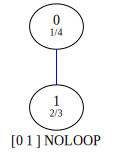

In [25]:
Source(read_dot_file("u1dfs"))

/Users/sushmaka/PSA/Output/1dfs.dot
digraph g {
	label = "[4 3 5 1 2 ] NOLOOP"
	4 [label = <4<BR /><FONT POINT-SIZE="10">1/10</FONT>>]
	3 [label = <3<BR /><FONT POINT-SIZE="10">2/9</FONT>>]
	5 [label = <5<BR /><FONT POINT-SIZE="10">7/8</FONT>>]
	1 [label = <1<BR /><FONT POINT-SIZE="10">3/6</FONT>>]
	2 [label = <2<BR /><FONT POINT-SIZE="10">4/5</FONT>>]

	edge [dir=none, color=blue]

	1 -> 2
	1 -> 3
	3 -> 4
	3 -> 5
}



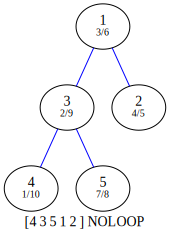

In [26]:
Source(read_dot_file("1dfs"))

/Users/sushmaka/PSA/Output/udf1dfs.dot
digraph g {
	label = "[0 1 3 5 4 2 ] LOOP"
	0 [label = <0<BR /><FONT POINT-SIZE="10">1/12</FONT>>]
	1 [label = <1<BR /><FONT POINT-SIZE="10">2/11</FONT>>]
	3 [label = <3<BR /><FONT POINT-SIZE="10">3/10</FONT>>]
	5 [label = <5<BR /><FONT POINT-SIZE="10">4/9</FONT>>]
	4 [label = <4<BR /><FONT POINT-SIZE="10">5/8</FONT>>]
	2 [label = <2<BR /><FONT POINT-SIZE="10">6/7</FONT>>]

	edge [color=pink]

	0 -> 1
	1 -> 3
	3 -> 5
	3 -> 2
	5 -> 4
	4 -> 2
	2 -> 0
}



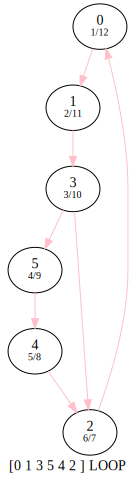

In [27]:
Source(read_dot_file("udf1dfs"))

/Users/sushmaka/PSA/Output/2dfs.dot
digraph g {
	label = "[1 2 3 4 5 ] NOLOOP"
	1 [label = <1<BR /><FONT POINT-SIZE="10">9/10</FONT>>]
	2 [label = <2<BR /><FONT POINT-SIZE="10">7/8</FONT>>]
	3 [label = <3<BR /><FONT POINT-SIZE="10">5/6</FONT>>]
	4 [label = <4<BR /><FONT POINT-SIZE="10">1/4</FONT>>]
	5 [label = <5<BR /><FONT POINT-SIZE="10">2/3</FONT>>]

	edge [color=pink]

	1 -> 2
	1 -> 3
	2 -> 4
	3 -> 4
	4 -> 5
}



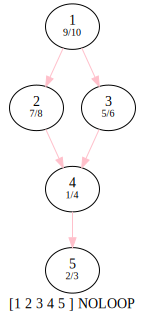

In [28]:
Source(read_dot_file("2dfs"))

/Users/sushmaka/PSA/Output/3dfs.dot
digraph g {
	label = "[0 1 3 4 2 ] LOOP"
	0 [label = <0<BR /><FONT POINT-SIZE="10">1/10</FONT>>]
	1 [label = <1<BR /><FONT POINT-SIZE="10">2/9</FONT>>]
	3 [label = <3<BR /><FONT POINT-SIZE="10">3/8</FONT>>]
	4 [label = <4<BR /><FONT POINT-SIZE="10">4/7</FONT>>]
	2 [label = <2<BR /><FONT POINT-SIZE="10">5/6</FONT>>]

	edge [color=pink]

	0 -> 1
	0 -> 2
	1 -> 3
	2 -> 3
	3 -> 4
	4 -> 2
}



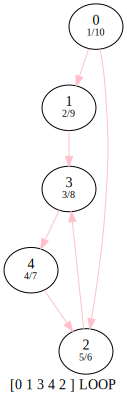

In [29]:
Source(read_dot_file("3dfs"))

/Users/sushmaka/PSA/Output/catdfs.dot
digraph g {
	label = "[Cab Car Cat Bar Mat Bat ] NOLOOP"
	Cab [label = <Cab<BR /><FONT POINT-SIZE="10">9/12</FONT>>]
	Car [label = <Car<BR /><FONT POINT-SIZE="10">10/11</FONT>>]
	Cat [label = <Cat<BR /><FONT POINT-SIZE="10">7/8</FONT>>]
	Bar [label = <Bar<BR /><FONT POINT-SIZE="10">5/6</FONT>>]
	Mat [label = <Mat<BR /><FONT POINT-SIZE="10">1/4</FONT>>]
	Bat [label = <Bat<BR /><FONT POINT-SIZE="10">2/3</FONT>>]

	edge [color=pink]

	Bar -> Bat
	Cab -> Car
	Cab -> Cat
	Car -> Bar
	Mat -> Bat
	Cat -> Mat
	Cat -> Bat
}



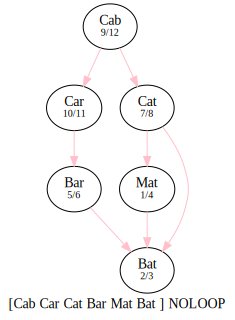

In [30]:
Source(read_dot_file("catdfs"))

/Users/sushmaka/PSA/Output/7dfs.dot
digraph g {
	label = "[0 3 1 2 4 5 6 ] NOLOOP"
	0 [label = <0<BR /><FONT POINT-SIZE="10">3/14</FONT>>]
	3 [label = <3<BR /><FONT POINT-SIZE="10">10/13</FONT>>]
	1 [label = <1<BR /><FONT POINT-SIZE="10">11/12</FONT>>]
	2 [label = <2<BR /><FONT POINT-SIZE="10">4/9</FONT>>]
	4 [label = <4<BR /><FONT POINT-SIZE="10">7/8</FONT>>]
	5 [label = <5<BR /><FONT POINT-SIZE="10">5/6</FONT>>]
	6 [label = <6<BR /><FONT POINT-SIZE="10">1/2</FONT>>]

	edge [color=pink]

	0 -> 2
	0 -> 3
	0 -> 1
	2 -> 5
	2 -> 4
	3 -> 2
	3 -> 4
	3 -> 1
	1 -> 6
	1 -> 4
	4 -> 6
	5 -> 6
}



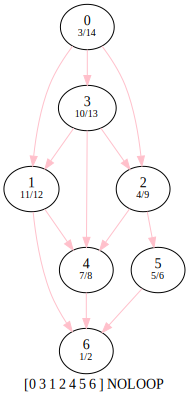

In [31]:
Source(read_dot_file("7dfs"))